# Multi-factor Structural Equation Modelling to assess job satisfaction and staying intentions

This data represents survey data on employees’ attitudes and perception towards their workplace. The questionnaire items included questions which attempts to represent the following latent constructs: 
- Organisational Commitment
- Attitudes Towards Co-Workers
- Environmental Perceptions
- Job Satisfaction
- Staying Intentions

The objective is to build a suitable model to predict the influences of the different factors on employees’ staying intentions.

## Objective: Assessing drivers of staying intentions

### Useful Functions

In [11]:
## ipak function: install multiple R packages, if not already installed
ipak <- function(pkg){
  new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
  if (length(new.pkg))
    install.packages(new.pkg, dependencies = TRUE)
}

## names of missing columns
nacols <- function(df) {
  colnames(df)[unlist(lapply(df, function(x) anyNA(x)))]
}


In [12]:
### Install and load r packages ====
## specify packages
packages <- c("tidyverse", "caret", "haven", "skimr", "DataExplorer", "GGally", 
              "ggplot2", "psych", "purrr", "dplyr", "data.table", "gvlma", "car", "lavaan", "semPlot")

# install packages
ipak(packages)

# load packages
for (val in packages){
    suppressMessages(library(val, character.only = TRUE))
}

The following dataset will be used. The dataset has been pre-processed, and is ready to be used for analysis.

In [13]:
Data_sem <- fread("../data/data.csv")
Data_sem <- Data_sem[complete.cases(Data_sem),]
str(Data_sem)

Classes 'data.table' and 'data.frame':	400 obs. of  28 variables:
 $ ID : int  1 2 3 4 5 6 7 8 9 10 ...
 $ JS1: int  5 3 4 4 5 6 2 2 4 5 ...
 $ OC1: int  3 0 6 7 2 5 6 4 9 5 ...
 $ OC2: int  5 5 10 7 10 8 10 9 10 9 ...
 $ EP1: int  10 10 10 10 10 8 9 10 8 10 ...
 $ OC3: int  10 3 10 10 9 7 10 9 10 9 ...
 $ OC4: int  10 7 10 7 9 7 9 7 10 10 ...
 $ EP2: int  10 10 10 10 9 10 9 10 6 10 ...
 $ EP3: int  5 10 10 9 10 7 9 10 8 8 ...
 $ AC1: int  1 2 1 2 1 1 2 1 3 2 ...
 $ EP4: chr  "." "7" "7" "7" ...
 $ JS2: int  4 4 2 5 4 6 3 2 5 3 ...
 $ JS3: int  3 3 2 4 3 5 6 1 1 2 ...
 $ AC2: int  2 1 4 1 1 2 4 1 4 4 ...
 $ SI1: int  4 5 5 5 5 5 5 3 3 4 ...
 $ JS4: int  3 2 3 2 2 3 4 1 1 2 ...
 $ SI2: int  4 4 5 4 5 4 5 4 3 4 ...
 $ JS5: int  23 43 60 33 58 62 11 21 80 33 ...
 $ AC3: int  1 1 1 1 2 1 3 1 3 1 ...
 $ SI3: int  3 4 5 3 3 3 5 4 2 3 ...
 $ AC4: chr  "1" "1" "2" "1" ...
 $ SI4: int  3 4 5 4 4 3 4 2 2 3 ...
 $ C1 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ C2 : int  0 1 1 0 1 0 1 1 0 0 ...
 $ C3 : int 

We will fit the model based on theoretical grounds to assess the underlying factors for Staying Intentions.

Our fitted model exhibits a good fit model, with high CFI with low RMSEA and SRMR. However, this can always be improved.

In [14]:
sem_formula <- "Organisational Commitment =~ OC1 + OC2 + OC3 +OC4
                Staying Intentions =~ SI1 + SI2 + SI3 + SI4
                Attitudes Towards CoWorkers =~ AC1 + AC2 + AC3 + AC4
                Environmental Perceptions =~ EP1 + EP2 + EP3 + EP4
                Job Satisfaction =~ JS1 + JS2 + JS3 + JS4 + JS5
                Staying Intentions ~ Job Satisfaction
                Staying Intentions ~ Organisational Commitment
                Organisational Commitment ~ Environmental Perceptions
                Organisational Commitment ~ Attitudes Towards CoWorkers
                Job Satisfaction ~ Environmental Perceptions
                Job Satisfaction ~ Attitudes Towards CoWorkers
                Attitudes Towards CoWorkers ~~ 0*Environmental Perceptions"

sem_model <- cfa(sem_formula, Data_sem)
summary(sem_model, standardized = TRUE, fit.measures = TRUE)

Warning message in data.matrix(data[case.idx[[g]], ov.idx, drop = FALSE]):
"NAs introduced by coercion"Warning message in data.matrix(data[case.idx[[g]], ov.idx, drop = FALSE]):
"NAs introduced by coercion"

lavaan 0.6-5 ended normally after 44 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         48
                                                      
  Number of observations                           400
                                                      
Model Test User Model:
                                                      
  Test statistic                               307.760
  Degrees of freedom                               183
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                              4454.908
  Degrees of freedom                               210
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.971
  Tucker-Lewis Index (TLI)                       0.966

Loglikelihood and Information Criteri

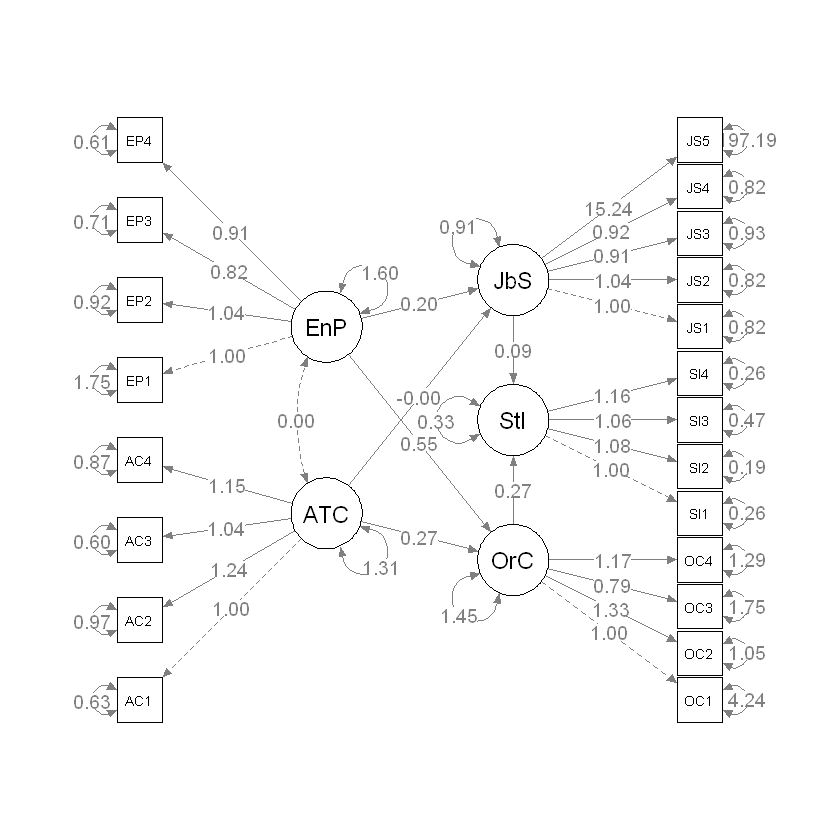

In [15]:
semPaths(sem_model,
         whatLabels = "est",
         edge.label.cex = 1,
         layout = "tree",
         rotation = 2)

We identify that the model can be further improved by including the effect of Environmental Perceptions on Staying Intentions.

In [16]:
modificationindices(sem_model, sort = TRUE)

,lhs,op,rhs,mi,epc,sepc.lv,sepc.all,sepc.nox
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
349,OrganisationalCommitment,~~,StayingIntentions,51.081552,-0.59364947,-0.86395757,-0.86395757,-0.86395757
364,EnvironmentalPerceptions,~,StayingIntentions,46.330874,1.09493240,0.60658528,0.60658528,0.60658528
360,OrganisationalCommitment,~,StayingIntentions,39.628813,-1.52060936,-0.74628283,-0.74628283,-0.74628283
354,StayingIntentions,~~,EnvironmentalPerceptions,36.888127,0.32372163,0.44933943,0.44933943,0.44933943
358,StayingIntentions,~,EnvironmentalPerceptions,36.888127,0.20293607,0.36631499,0.36631499,0.36631499
355,StayingIntentions,~~,JobSatisfaction,36.871558,-0.92325167,-1.69829479,-1.69829479,-1.69829479
365,EnvironmentalPerceptions,~,OrganisationalCommitment,19.889083,1.02003976,1.15142557,1.15142557,1.15142557
370,AttitudesTowardsCoWorkers,~,JobSatisfaction,19.888602,1.15093980,0.99097541,0.99097541,0.99097541
371,AttitudesTowardsCoWorkers,~,EnvironmentalPerceptions,19.888561,0.22972084,0.25340559,0.25340559,0.25340559


With the inclusion of the direct effect of Environmental Perceptions on Staying Intentions, our model shows better fit than the previous iteration.

The anova test shows a significant difference between the new and old model, with key fit measures such as aic and ecvi being lower for the new model.

In [17]:
sem_formula2 <- "Organisational Commitment =~ OC1 + OC2 + OC3 +OC4
                Staying Intentions =~ SI1 + SI2 + SI3 + SI4
                Attitudes Towards CoWorkers =~ AC1 + AC2 + AC3 + AC4
                Environmental Perceptions =~ EP1 + EP2 + EP3 + EP4
                Job Satisfaction =~ JS1 + JS2 + JS3 + JS4 + JS5
                Staying Intentions ~ Job Satisfaction
                Staying Intentions ~ Organisational Commitment
                Staying Intentions ~ Environmental Perceptions
                Organisational Commitment ~ Environmental Perceptions
                Organisational Commitment ~ Attitudes Towards CoWorkers
                Job Satisfaction ~ Environmental Perceptions
                Job Satisfaction ~ Attitudes Towards CoWorkers
                Attitudes Towards CoWorkers ~~ 0*Environmental Perceptions"

sem_model2 <- cfa(sem_formula2, Data_sem)

anova(sem_model, sem_model2)

Warning message in data.matrix(data[case.idx[[g]], ov.idx, drop = FALSE]):
"NAs introduced by coercion"Warning message in data.matrix(data[case.idx[[g]], ov.idx, drop = FALSE]):
"NAs introduced by coercion"

,Df,AIC,BIC,Chisq,Chisq diff,Df diff,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
sem_model2,182,27951.09,28146.67,268.5169,NA,NA,NA
sem_model,183,27988.33,28179.92,307.7599,39.24306,1,3.741968e-10


In [18]:
fitmeasures(sem_model, c("aic", "ecvi"))

aic      ecvi 
27988.329     1.009

In [19]:
fitmeasures(sem_model2, c("aic", "ecvi"))

aic      ecvi 
27951.086     0.916

Keeping the new model, we add the path coefficients so that we can study the direct and indirect effect of each latent variable on Staying Intentions.

In [20]:
sem_formula2_path <- "Organisational Commitment =~ OC1 + OC2 + OC3 +OC4
                Staying Intentions =~ SI1 + SI2 + SI3 + SI4
                Attitudes Towards CoWorkers =~ AC1 + AC2 + AC3 + AC4
                Environmental Perceptions =~ EP1 + EP2 + EP3 + EP4
                Job Satisfaction =~ JS1 + JS2 + JS3 + JS4 + JS5
                Staying Intentions ~ a*Job Satisfaction
                Staying Intentions ~ b*Organisational Commitment
                Staying Intentions ~ c*Environmental Perceptions
                Organisational Commitment ~ d*Environmental Perceptions
                Organisational Commitment ~ e*Attitudes Towards CoWorkers
                Job Satisfaction ~ f*Environmental Perceptions
                Job Satisfaction ~ g*Attitudes Towards CoWorkers
                Attitudes Towards CoWorkers ~~ 0*Environmental Perceptions"

sem_model2_path <- cfa(sem_formula2_path, Data_sem)

summary(sem_model2_path, standardized = TRUE, fit.measures = TRUE)

Warning message in data.matrix(data[case.idx[[g]], ov.idx, drop = FALSE]):
"NAs introduced by coercion"Warning message in data.matrix(data[case.idx[[g]], ov.idx, drop = FALSE]):
"NAs introduced by coercion"

lavaan 0.6-5 ended normally after 45 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         49
                                                      
  Number of observations                           400
                                                      
Model Test User Model:
                                                      
  Test statistic                               268.517
  Degrees of freedom                               182
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                              4454.908
  Degrees of freedom                               210
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.980
  Tucker-Lewis Index (TLI)                       0.976

Loglikelihood and Information Criteri

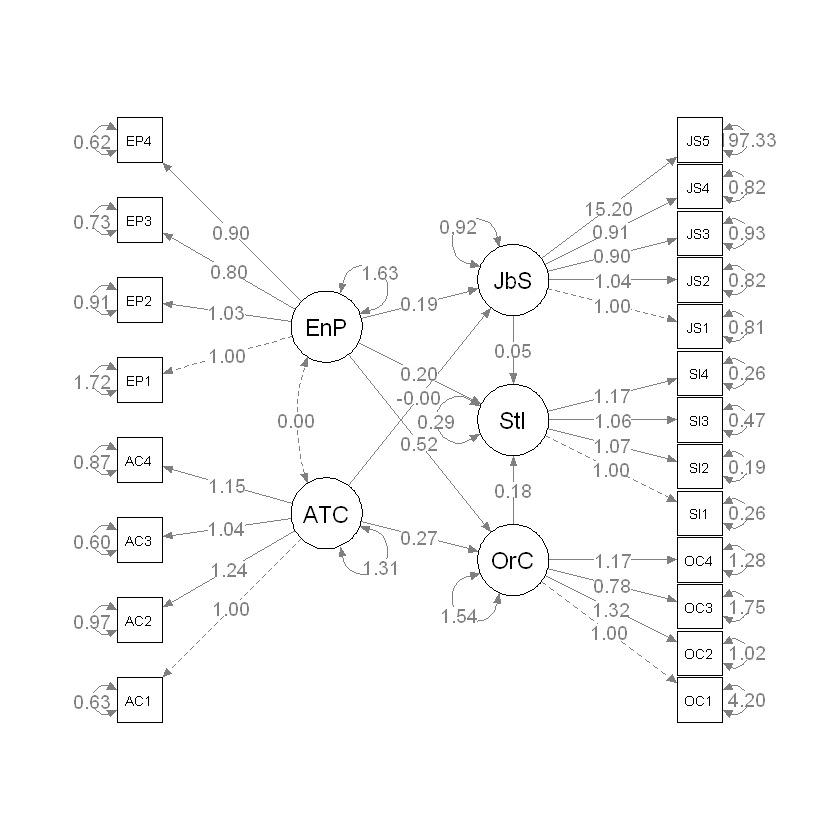

In [21]:
semPaths(sem_model2_path,
         whatLabels = "est",
         edge.label.cex = 1,
         layout = "tree",
         rotation = 2)

The direct effect and the total effects can now be calculated.

For example, the direct effect of Environmental Perception on Staying Intention is c: 0.2 units per increase in 1 unit in Environmental Perception The indirect effect is fa: 0.009457 units per increase in 1 unit in Environmental Perception The total effect is c + fa: 0.209457 units per increase in 1 unit in Environmental Perception

In [22]:
parameterestimates(sem_model2_path)

lhs,op,rhs,label,est,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
OrganisationalCommitment,=~,OC1,,1.000000000,0.00000000,NA,NA,1.00000000,1.0000000
OrganisationalCommitment,=~,OC2,,1.319125438,0.11085306,11.89976541,0.000000e+00,1.10185743,1.5363934
OrganisationalCommitment,=~,OC3,,0.781783269,0.07775318,10.05467962,0.000000e+00,0.62938985,0.9341767
OrganisationalCommitment,=~,OC4,,1.165959378,0.09997097,11.66297978,0.000000e+00,0.97001988,1.3618989
StayingIntentions,=~,SI1,,1.000000000,0.00000000,NA,NA,1.00000000,1.0000000
StayingIntentions,=~,SI2,,1.074157229,0.05554332,19.33908808,0.000000e+00,0.96529431,1.1830201
StayingIntentions,=~,SI3,,1.064244525,0.06714931,15.84892611,0.000000e+00,0.93263429,1.1958548
StayingIntentions,=~,SI4,,1.165746905,0.06145400,18.96942215,0.000000e+00,1.04529927,1.2861945
AttitudesTowardsCoWorkers,=~,AC1,,1.000000000,0.00000000,NA,NA,1.00000000,1.0000000


In [23]:
#c:
0.200

[1] 0.2

In [24]:
#f*a:
0.193*0.049

[1] 0.009457

In [25]:
#c + f*a:
0.200 + (0.193*0.049)

[1] 0.209457

References:
https://www.youtube.com/watch?v=Flqbo8J3li4

## END